In [171]:
import altair as alt

# saving data into a file rather than embedding into the chart
# alt.data_transformers.enable('json') 
# alt.data_transformers.enable('data_server')
alt.data_transformers.enable('default',max_rows=10000)
alt.renderers.enable('notebook',embed_options={'renderer': 'svg'})
# alt.renderers.enable('jupyterlab')
from vega_datasets import data
import pandas as pd
from altair import Scale,Color

In [65]:
file = 'annual_county_level.csv'

In [66]:
dforg = pd.read_csv(file,header=0)

In [67]:
dforg.head()

Unnamed: 0 state  fips  year    BUYER_COUNTY    pills  population  \
0           1    AK  2013  2006  ALEUTIANS EAST    300.0        2794   
1           2    AK  2013  2007  ALEUTIANS EAST    100.0        3012   
2           3    AK  2016  2006  ALEUTIANS WEST  26700.0        5658   
3           4    AK  2016  2007  ALEUTIANS WEST  33500.0        5466   
4           5    AK  2016  2008  ALEUTIANS WEST  30000.0        5393   

   Pill_per_pop  
0      0.107373  
1      0.033201  
2      4.718982  
3      6.128796  
4      5.562767

In [68]:
dforg.describe()

Unnamed: 0          fips          year         pills    population  \
count  20988.000000  20988.000000  20988.000000  2.098800e+04  2.098800e+04   
mean   10494.500000  30287.508529   2009.000000  3.646579e+06  1.010772e+05   
std     6058.858061  15118.266208      2.001572  9.739507e+06  3.153288e+05   
min        1.000000   1001.000000   2006.000000  2.000000e+01  4.890000e+02   
25%     5247.750000  18173.000000   2007.000000  3.506825e+05  1.285575e+04   
50%    10494.500000  29118.000000   2009.000000  1.080840e+06  2.769200e+04   
75%    15741.250000  45041.500000   2011.000000  3.076068e+06  7.005025e+04   
max    20988.000000  56045.000000   2012.000000  2.326166e+08  9.840024e+06   

       Pill_per_pop  
count  20988.000000  
mean      38.562225  
std       24.920452  
min        0.005968  
25%       22.587628  
50%       34.015286  
75%       48.676498  
max      501.605074

In [69]:
fdf = dforg[['fips','year','Pill_per_pop']]
fdf.to_csv('sample_data.csv',index=False)

In [70]:
fdf = dforg[['fips','year','Pill_per_pop','BUYER_COUNTY','state']]

In [71]:
fdf['Pill_per_pop'] = fdf["Pill_per_pop"].astype(int)
fdf['BUYER_COUNTY'] = fdf["BUYER_COUNTY"].astype(str)
fdf['state'] = fdf["state"].astype(str)
fdf.loc[fdf['Pill_per_pop']>150, ['Pill_per_pop']] = 150

C:\Users\Satya\Anaconda3\envs\dviz\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Satya\Anaconda3\envs\dviz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Satya\Anaconda3\envs\dviz\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [72]:
dummy = 'nothing'

#The color scheme we use is yellowgreenblue

In [73]:
# import matplotlib
# from matplotlib import *
# # Mention the color scheme/map you are using currently
# cmap = cm.get_cmap('viridis_r', 15)
# cutoff = 0
# for i in range(cmap.N):
#     rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
#     print(matplotlib.colors.rgb2hex(rgb))
#     if i == cutoff:
#         dummy = matplotlib.colors.rgb2hex(rgb)

In [74]:
dummy = '#ECFAAC'
# dummy = '#E1EDAA'

In [75]:
def choropleth(data,level,year=2006,color=True,scheme='yellowgreenblue',dummy=dummy,stroke='black',strokeWidth=0.05,type='linear',fips='fips'):
    if color:
        chart = alt.Chart(level).mark_geoshape(
            stroke=stroke,
            strokeWidth=strokeWidth
        ).project(
            type='albersUsa'
        ).transform_lookup(
            lookup='id',
            from_=alt.LookupData(data, fips, ['year','Pill_per_pop','BUYER_COUNTY','state'])
        ).transform_calculate(
            Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
        ).encode(
            color = alt.condition(
                'datum.Pill_per_pop > 0',
                alt.Color('Pill_per_pop:Q', scale=Scale(scheme=scheme,type=type)),
                alt.value(dummy)
                ),
            tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
        ).properties(
            width=700,
            height=400,
            title='Pills per person, {}'.format(year)
        )
    else:
        chart = alt.Chart(level).mark_geoshape(
            stroke=stroke,
            strokeWidth=strokeWidth
        ).project(
            type='albersUsa'
        ).transform_lookup(
            lookup='id',
            from_=alt.LookupData(data, fips, ['year','Pill_per_pop','BUYER_COUNTY','state'])
        ).transform_calculate(
            Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
        ).encode(
            tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
        ).properties(
            width=700,
            height=400,
            title='Pills per person, {}'.format(year)
        )
        
    return chart

In [76]:
states = alt.topo_feature(data.us_10m.url, 'states')
counties = alt.topo_feature(data.us_10m.url+'#', 'counties')

In [77]:
def plot_year(year,fdf=fdf,counties=counties,states=states,state_stroke='black',state_strokew=0.3):
    fdf1 = fdf[fdf.year==year]
    chart = choropleth(fdf1,counties,year=year)
    
    outline = alt.Chart(states).mark_geoshape(stroke=state_stroke,strokeWidth=state_strokew).project(
    type='albersUsa'
    )
    
    chart1 = choropleth(fdf1,counties,color=False,year=year)
    
    return chart+outline+chart1

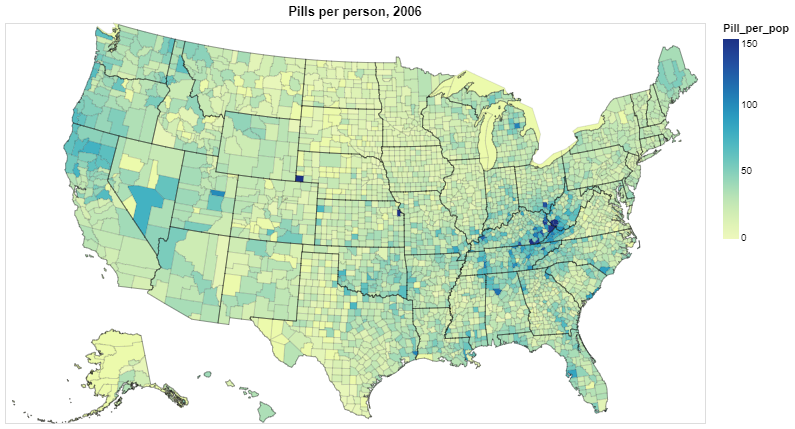

In [78]:
plot_year(2006)

In [79]:
chart = plot_year(2006)
chart.save('2006.png',scale_factor=2.0)

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [ ]:
plot_year(2007)

In [ ]:
plot_year(2008)

In [ ]:
plot_year(2009)

In [ ]:
plot_year(2010)

In [ ]:
plot_year(2011)

In [ ]:
plot_year(2012)

In [ ]:
dummy='#dbe9f6'
scheme='blues'
type1='linear'

fg = alt.Chart(counties).mark_geoshape(
        stroke='black',
        strokeWidth=0.05
    ).project(
        type='albersUsa'
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(fdf, 'fips', ['year','Pill_per_pop','BUYER_COUNTY', 'state'])
    ).transform_calculate(
        Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
    ).encode(
        color = alt.condition(
            'datum.Pill_per_pop > 0',
            alt.Color('Pill_per_pop:Q', scale=Scale(scheme=scheme,type=type1)),
            alt.value(dummy)
            ),
        tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
    ).properties(
        width=700,
        height=400,
        title='Pills per person'
)

outline = alt.Chart(states).mark_geoshape(stroke='black',strokeWidth=0.2).project(
    type='albersUsa'
    )

fg1 = alt.Chart(counties).mark_geoshape(
        stroke='black',
        strokeWidth=0.05
    ).project(
        type='albersUsa'
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(fdf, 'fips', ['year','Pill_per_pop','BUYER_COUNTY', 'state'])
    ).transform_calculate(
        Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
    ).encode(
        tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
    ).properties(
        width=700,
        height=400,
        title='Pills per person'
)

fg+outline+fg1

In [ ]:
fdfn = fdf.pivot_table(index='fips',columns='year',values=['Pill_per_pop']).reset_index('fips')

In [ ]:
fdfn = fdfn.set_index('fips').join(fdf[['fips','BUYER_COUNTY','state']].set_index('fips'))

In [ ]:
fdfn.columns = [str(i[1]) if type(i)==tuple else i for i in fdfn.columns]

In [ ]:
fdfn.columns

In [ ]:
fdfn.head()

In [ ]:
fdfn = fdfn.reset_index()

In [80]:
# dummy='#dbe9f6'
# scheme='blues'
# type1='linear'

# fg = alt.Chart(counties).mark_geoshape(
#         stroke='black',
#         strokeWidth=0.05
#     ).project(
#         type='albersUsa'
#     ).transform_lookup(
#         lookup='id',
#         from_=alt.LookupData(fdfn, 'fips', ['year','Pill_per_pop','BUYER_COUNTY', 'state'])
#     ).transform_calculate(
#         Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
#     ).encode(
#         color = alt.condition(
#             'datum.Pill_per_pop > 0',
#             alt.Color('Pill_per_pop:Q', scale=Scale(scheme=scheme,type=type1)),
#             alt.value(dummy)
#             ),
#         tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
#     ).properties(
#         width=700,
#         height=400,
#         title='Pills per person'
# )

# outline = alt.Chart(states).mark_geoshape(stroke='black',strokeWidth=0.2).project(
#     type='albersUsa'
#     )

# fg1 = alt.Chart(counties).mark_geoshape(
#         stroke='black',
#         strokeWidth=0.05
#     ).project(
#         type='albersUsa'
#     ).transform_lookup(
#         lookup='id',
#         from_=alt.LookupData(fdfn, 'fips', ['year','Pill_per_pop','BUYER_COUNTY', 'state'])
#     ).transform_fold(
#     columns, as_=['year', 'Pill_per_pop']
#     ).transform_calculate(
#         Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
#     ).encode(
#         tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
#     ).properties(
#         width=700,
#         height=400,
#         title='Pills per person'
# )

# # fg+outline+fg1

In [81]:
dummy='#dbe9f6'
scheme='blues'
type1='linear'

slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="key", fields=['key'],
                                   bind=slider, init={'key': 2006})

fg = alt.Chart(counties).mark_geoshape(
        stroke='black',
        strokeWidth=0.05
    ).project(
        type='albersUsa'
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(fdfn, 'fips', [str(i) for i in range(2006,2013)]+['Pill_per_pop','BUYER_COUNTY', 'state'])
    ).transform_calculate(
        Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
    ).transform_fold(
    [str(i) for i in range(2006,2013)],
    ).encode(
        color = alt.condition(
            'datum.Pill_per_pop > 0',
            alt.Color('Pill_per_pop:Q', scale=Scale(scheme=scheme,type=type1)),
            alt.value(dummy)
            ),
        tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','key:Q']
    ).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)

NameError: name 'fdfn' is not defined

In [ ]:
fg

In [ ]:
fdfn = fdf.pivot_table(index='fips',columns='year',values=['Pill_per_pop']).reset_index('fips')
fdfn = fdfn.set_index('fips').join(fdf[['fips','BUYER_COUNTY','state']].set_index('fips'))

In [ ]:
fdfn = fdf.pivot_table(index='fips',columns='year',values=['Pill_per_pop']).reset_index('fips')

In [ ]:
fdfn

In [82]:
fdfn.columns = [str(i[1]) if type(i)==tuple else i for i in fdfn.columns]

NameError: name 'fdfn' is not defined

In [ ]:
fdfn.columns = ['fips' if i=='' else i for i in fdfn.columns ]

In [ ]:
fdfn.to_csv('sample_data_pivot.csv',index=False)

In [83]:
import altair as alt
import pandas as pd
from vega_datasets import data

fdf = pd.read_csv('https://raw.githubusercontent.com/sdasara95/Opioid-Crisis/master/sample_data.csv')
fdf['year'] = fdf['year'].astype(str)
fdf = fdf.pivot(index='fips', columns='year', values='Pill_per_pop').reset_index()
columns = [str(year) for year in range(2006, 2013)]

slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2006})

a = alt.Chart(counties).mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'fips', columns)
).transform_fold(
    columns, as_=['year', 'Pill_per_pop']
).transform_calculate(
    year='parseInt(datum.year)',
    Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
).encode(
    color = alt.condition(
        'datum.Pill_per_pop > 0',
        alt.Color('Pill_per_pop:Q', scale=alt.Scale(scheme='blues')),
        alt.value('#dbe9f6')
    )).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)

b = outline = alt.Chart(states).mark_geoshape(stroke='black',strokeWidth=0.2).project(
    type='albersUsa'
    )

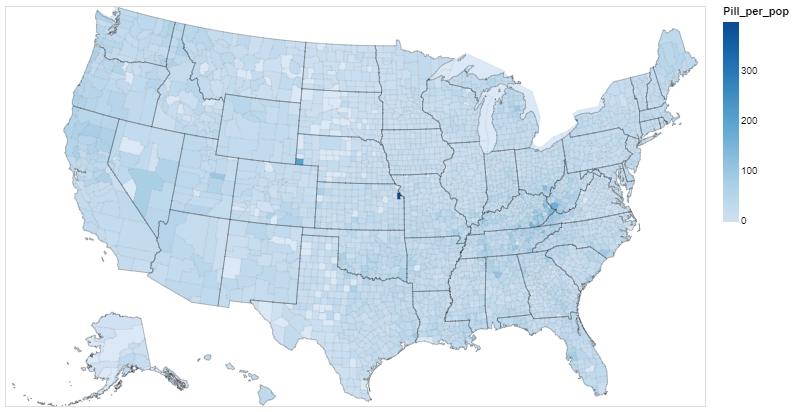

In [84]:
a+b

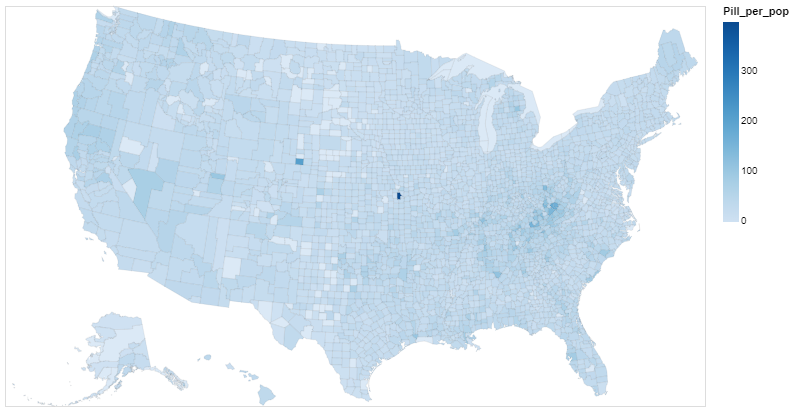

In [85]:
import altair as alt
import pandas as pd
from vega_datasets import data

us_counties = alt.topo_feature(data.us_10m.url, 'counties')
fdf = pd.read_csv('https://raw.githubusercontent.com/sdasara95/Opioid-Crisis/master/sample_data.csv')
fdf['year'] = fdf['year'].astype(str)
fdf = fdf.pivot(index='fips', columns='year', values='Pill_per_pop').reset_index()
columns = [str(year) for year in range(2006, 2013)]

slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2006})

alt.Chart(us_counties).mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'fips', columns)
).transform_fold(
    columns, as_=['year', 'Pill_per_pop']
).transform_calculate(
    year='parseInt(datum.year)',
    Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
).encode(
    color = alt.condition(
        'datum.Pill_per_pop > 0',
        alt.Color('Pill_per_pop:Q', scale=alt.Scale(scheme='blues')),
        alt.value('#dbe9f6')
    )).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)

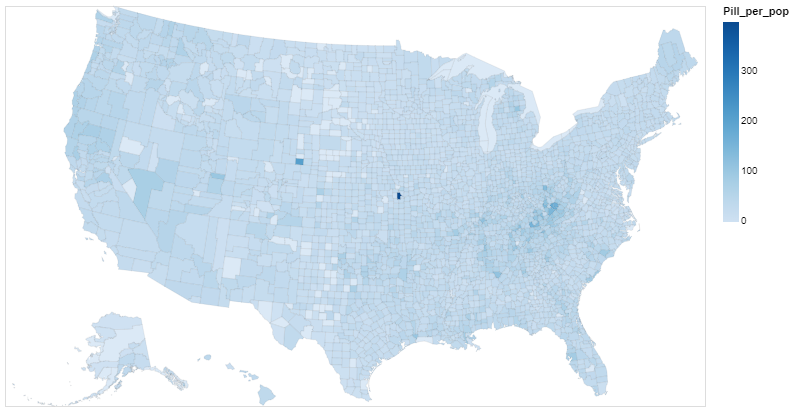

In [89]:
import altair as alt
import pandas as pd
from vega_datasets import data

us_counties = alt.topo_feature(data.us_10m.url, 'counties')
fdf = pd.read_csv('https://raw.githubusercontent.com/sdasara95/Opioid-Crisis/master/sample_data.csv')
fdf['year'] = fdf['year'].astype(str)
fdf = fdf.pivot(index='fips', columns='year', values='Pill_per_pop').reset_index()
columns = [str(year) for year in range(2006, 2013)]

slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2006})

chart = alt.Chart(us_counties).mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'fips', columns)
).transform_fold(
    columns, as_=['year', 'Pill_per_pop']
).transform_calculate(
    year='parseInt(datum.year)',
    Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
).encode(
    color = alt.condition(
        'datum.Pill_per_pop > 0',
        alt.Color('Pill_per_pop:Q', scale=alt.Scale(scheme='blues')),
        alt.value('#dbe9f6')
    )).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)

chart

In [87]:
chart.save('chart.html', embed_options={'renderer':'svg'})

# NOW WE WILL DEAL WITH DEATH DATA

In [249]:
import pandas as pd

In [250]:
dforg = pd.read_csv('death_data2.tsv',sep='\t')

In [251]:
dforg = dforg.reset_index()
dforg.drop(['index'],axis=1,inplace=True)

In [252]:
dforg.head()

Year  Year Code     State  State Code                County  County Code  \
0  2006       2006   Alabama           1  Jefferson County, AL         1073   
1  2006       2006   Alabama           1     Mobile County, AL         1097   
2  2006       2006   Arizona           4   Maricopa County, AZ         4013   
3  2006       2006   Arizona           4       Pima County, AZ         4019   
4  2006       2006  Arkansas           5    Pulaski County, AR         5119   

    Race Race Code  Deaths  Population  Crude Rate  
0  White    2106-3      23      371236         6.2  
1  White    2106-3      10      252038  Unreliable  
2  White    2106-3     132     3222564         4.1  
3  White    2106-3      34      834649         4.1  
4  White    2106-3      10      232701  Unreliable

In [253]:
dforg['Year']=dforg['Year'].astype(str)

In [254]:
dforg['Deaths_per_100k'] = dforg['Deaths']*100000/dforg['Population']

In [255]:
dforg['Deaths_per_100k'] = dforg['Deaths_per_100k'].astype(int)

In [256]:
dforg.dtypes

Year               object
Year Code           int64
State              object
State Code          int64
County             object
County Code         int64
Race               object
Race Code          object
Deaths              int64
Population          int64
Crude Rate         object
Deaths_per_100k     int32
dtype: object

In [257]:
dforg.head()

Year  Year Code     State  State Code                County  County Code  \
0  2006       2006   Alabama           1  Jefferson County, AL         1073   
1  2006       2006   Alabama           1     Mobile County, AL         1097   
2  2006       2006   Arizona           4   Maricopa County, AZ         4013   
3  2006       2006   Arizona           4       Pima County, AZ         4019   
4  2006       2006  Arkansas           5    Pulaski County, AR         5119   

    Race Race Code  Deaths  Population  Crude Rate  Deaths_per_100k  
0  White    2106-3      23      371236         6.2                6  
1  White    2106-3      10      252038  Unreliable                3  
2  White    2106-3     132     3222564         4.1                4  
3  White    2106-3      34      834649         4.1                4  
4  White    2106-3      10      232701  Unreliable                4

In [258]:
dforg['County'] = dforg['County'].apply(lambda x: x.split(',')[0])

In [259]:
reqcols = ['Year','County Code','Deaths_per_100k']
addcols = ['State','County']

In [260]:
fdf = dforg[reqcols]

In [261]:
fdf

Year  County Code  Deaths_per_100k
0     2006         1073                6
1     2006         1097                3
2     2006         4013                4
3     2006         4019                4
4     2006         5119                4
...    ...          ...              ...
1921  2012        55079                9
1922  2012        55079               10
1923  2012        55101                6
1924  2012        55105                8
1925  2012        55133                8

[1926 rows x 3 columns]

In [262]:
fdf = fdf.pivot_table(index='County Code',columns='Year',values='Deaths_per_100k').reset_index()

In [263]:
fdf.fillna(0,inplace=True)

In [264]:
fdf = pd.merge(fdf,dforg[addcols+['County Code']],on='County Code')

In [265]:
fdf.head()

County Code  2006  2007  2008  2009  2010  2011  2012    State  \
0         1073   6.0   9.0   6.0   9.0   6.0  12.0   8.5  Alabama   
1         1073   6.0   9.0   6.0   9.0   6.0  12.0   8.5  Alabama   
2         1073   6.0   9.0   6.0   9.0   6.0  12.0   8.5  Alabama   
3         1073   6.0   9.0   6.0   9.0   6.0  12.0   8.5  Alabama   
4         1073   6.0   9.0   6.0   9.0   6.0  12.0   8.5  Alabama   

             County  
0  Jefferson County  
1  Jefferson County  
2  Jefferson County  
3  Jefferson County  
4  Jefferson County

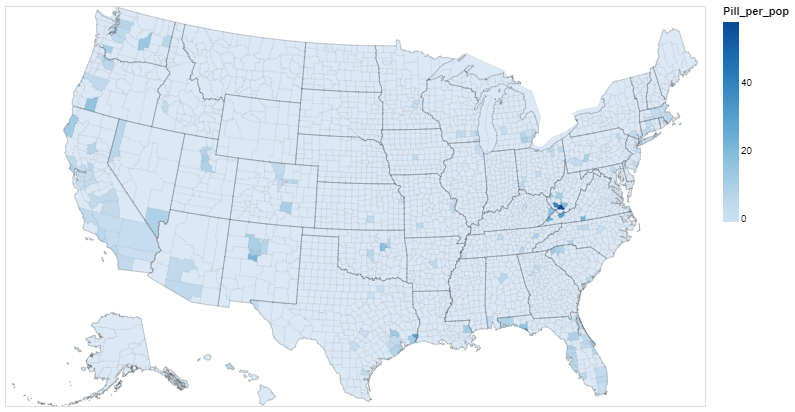

In [266]:
import altair as alt
from vega_datasets import data

us_states = alt.topo_feature(data.us_10m.url, 'states')
us_counties = alt.topo_feature(data.us_10m.url+'#', 'counties')

columns = [str(year) for year in range(2006, 2013)]

slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2006})

chart = alt.Chart(us_counties).mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'County Code', columns)
).transform_fold(
    columns, as_=['year', 'Deaths_per_100k']
).transform_calculate(
    year='parseInt(datum.year)',
    Pill_per_pop='isValid(datum.Deaths_per_100k) ? datum.Deaths_per_100k : -1'  
).encode(
    color = alt.condition(
        'datum.Deaths_per_100k > 0',
        alt.Color('Pill_per_pop:Q', scale=alt.Scale(scheme='blues')),
        alt.value('#dbe9f6')
    )).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)

outline = alt.Chart(us_states).mark_geoshape(stroke='black',strokeWidth=0.15).project(
    type='albersUsa'
    )

chart2 = alt.Chart(us_counties).mark_geoshape(
    fillOpacity=0
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'County Code', columns+addcols)
).transform_fold(
    columns, as_=['year', 'Deaths_per_100k']
).transform_calculate(
    year='parseInt(datum.year)',
    Pill_per_pop='isValid(datum.Deaths_per_100k) ? datum.Deaths_per_100k : -1'  
).encode(
    tooltip=['County:N', 'State:N','Deaths_per_100k:Q','year:Q']
    ).properties(
    width=700,
    height=400
)

chart+outline+chart2